# 可选实验：模型表示

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## 目标
在本实验中，您将：
- 学习实现单变量线性回归的模型 $f_{w,b}$

## 符号说明
以下是您将遇到的一些符号的总结。

| 符号 | 描述 | Python (如适用) |
|:---|:---|:---|
| $a$ | 标量，非粗体 | |
| $\mathbf{a}$ | 向量，粗体 | |
| **回归** | | |
| $\mathbf{x}$ | 训练样本特征值（在本实验中 - 尺寸（1000 平方英尺）） | `x_train` |
| $\mathbf{y}$ | 训练样本目标值（在本实验中价格（千美元）） | `y_train` |
| $x^{(i)}$, $y^{(i)}$ | 第 $i$ 个训练样本 | `x_i`, `y_i` |
| m | 训练样本数量 | `m` |
| $w$ | 参数：权重 | `w` |
| $b$ | 参数：偏置 | `b` |
| $f_{w,b}(x^{(i)})$ | 模型在 $x^{(i)}$ 处的评估结果，由 $w,b$ 参数化：$f_{w,b}(x^{(i)}) = wx^{(i)}+b$ | `f_wb` | 


## 工具
在本实验中，您将使用：
- NumPy，一个流行的科学计算库
- Matplotlib，一个流行的数据绘图库

In [ ]:
! pip install numpy matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# 问题陈述
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " /> 

正如在课程中，您将使用房价预测的示例。
本实验将使用一个简单的数据集，只有两个数据点 - 一栋 1000 平方英尺的房子以 30 万美元售出，一栋 2000 平方英尺的房子以 50 万美元售出。这两个点将构成我们的*数据或训练集*。在本实验中，尺寸的单位是 1000 平方英尺，价格的单位是千美元。

| 尺寸（1000 平方英尺）     | 价格（千美元） |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

您希望通过这两个点拟合一个线性回归模型（上面显示为蓝色直线），这样您就可以预测其他房子的价格 - 例如，一栋 1200 平方英尺的房子。


请运行以下代码单元格以创建 `x_train` 和 `y_train` 变量。数据存储在一维 NumPy 数组中。

In [4]:
# x_train 是输入变量（尺寸，单位：1000 平方英尺）
# y_train 是目标值（价格，单位：千美元）
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**注意**：本课程在打印时将经常使用 Python 'f-string' 输出格式化，如[此处](https://docs.python.org/3/tutorial/inputoutput.html)所述。花括号之间的内容在生成输出时会被计算。

### 训练样本数量 `m`
您将使用 `m` 表示训练样本的数量。NumPy 数组有一个 `.shape` 参数。`x_train.shape` 返回一个 Python 元组，每个维度都有一个条目。`x_train.shape[0]` 是数组的长度和样本数量，如下所示。

In [5]:
# m 是训练样本的数量
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


也可以使用 Python `len()` 函数，如下所示。

In [6]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### 训练样本 `x_i, y_i`

您将使用 $(x^{(i)},\ y^{(i)})$ 表示第 $i$ 个训练样本。由于 Python 使用零索引，$(x^{(0)},\ y^{(0)})$ 是 $(1.0,\ 300.0)$，$(x^{(1)},\ y^{(1)})$ 是 $(2.0,\ 500.0)$。

要访问 NumPy 数组中的值，可以使用所需的偏移量索引数组。例如，访问 `x_train` 位置零的语法是 `x_train[0]`。
运行下面的下一个代码块以获取第 $i$ 个训练样本。

In [7]:
i = 0 # 将此更改为 1 以查看 (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### 绘制数据

您可以使用 `matplotlib` 库中的 `scatter()` 函数绘制这两个点，如下面的单元格所示。
- 函数参数 `marker` 和 `c` 将点显示为红色十字（默认是蓝点）。

您可以使用 `matplotlib` 库中的其他函数来设置标题和标签以显示

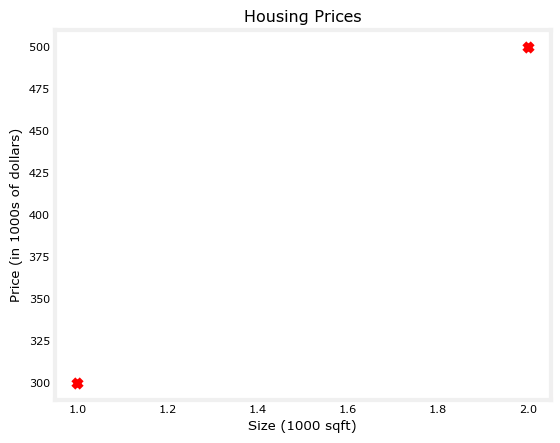

In [8]:
# 绘制数据点
plt.scatter(x_train, y_train, marker='x', c='r')
# 设置标题
plt.title("Housing Prices")
# 设置 y 轴标签
plt.ylabel('Price (in 1000s of dollars)')
# 设置 x 轴标签
plt.xlabel('Size (1000 sqft)')
plt.show()

## 模型函数

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > 正如课程中所述，线性回归的模型函数（一个从 `x` 映射到 `y` 的函数）表示为

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

上面的公式是表示直线的方式 - $w$ 和 $b$ 的不同值会在图上给出不同的直线。 <br/> <br/> <br/> <br/> <br/> 

让我们通过下面的代码块来更好地理解这一点。让我们从 $w = 100$ 和 $b = 100$ 开始。

**注意：您可以回到此单元格来调整模型的 w 和 b 参数**

In [9]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


现在，让我们计算两个数据点的 $f_{w,b}(x^{(i)})$ 值。您可以为每个数据点明确写出 -

对于 $x^{(0)}$，`f_wb = w * x[0] + b`

对于 $x^{(1)}$，`f_wb = w * x[1] + b`

对于大量数据点，这可能会变得繁琐和重复。因此，您可以在 `for` 循环中计算函数输出，如下面的 `compute_model_output` 函数所示。
> **注意**：参数描述 `(ndarray (m,))` 描述形状为 (m,) 的 NumPy n 维数组。`(scalar)` 描述没有维度的参数，只是一个数值。  
> **注意**：`np.zeros(n)` 将返回一个包含 $n$ 个条目的一维 numpy 数组   


In [10]:
def compute_model_output(x, w, b):
    """
    计算线性模型的预测
    参数:
      x (ndarray (m,)): 数据，m 个样本 
      w,b (scalar)    : 模型参数  
    返回
      y (ndarray (m,)): 目标值
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

现在让我们调用 `compute_model_output` 函数并绘制输出。

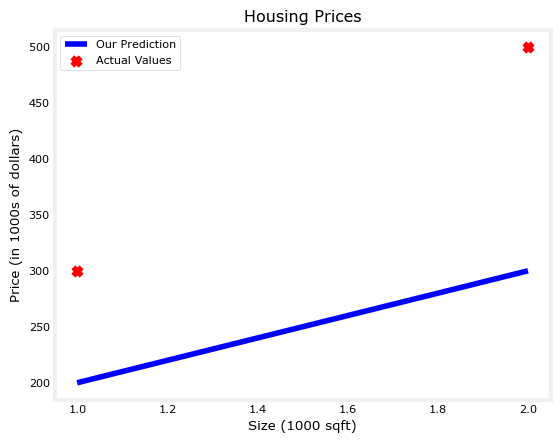

In [11]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# 绘制我们的模型预测
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# 绘制数据点
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# 设置标题
plt.title("Housing Prices")
# 设置 y 轴标签
plt.ylabel('Price (in 1000s of dollars)')
# 设置 x 轴标签
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

如您所见，设置 $w = 100$ 和 $b = 100$ *不会*产生适合我们数据的直线。

### 挑战
尝试使用不同的 $w$ 和 $b$ 值进行实验。适合我们数据的直线应该是什么值？

#### 提示：
您可以使用鼠标点击下面绿色"提示"左侧的三角形，以显示选择 b 和 w 的一些提示。

<details>
<summary>
    <font size='3', color='darkgreen'><b>提示</b></font>
</summary>
    <p>
    <ul>
        <li>尝试 $w = 200$ 和 $b = 100$ </li>
    </ul>
    </p>

### 预测
现在我们有了一个模型，我们可以使用它来进行原始预测。让我们预测一栋 1200 平方英尺的房子价格。由于 $x$ 的单位是 1000 平方英尺，$x$ 是 1.2。


In [12]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# 恭喜！
在本实验中，您已经学习了：
 - 线性回归构建一个模型，建立特征和目标之间的关系
     - 在上面的示例中，特征是房屋大小，目标是房屋价格
     - 对于简单线性回归，模型有两个参数 $w$ 和 $b$，它们的值使用*训练数据*进行'拟合'。
     - 一旦确定了模型的参数，就可以使用该模型对新数据进行预测。